# Práctica 3 (Recursión)

* **Autor:** Axel Daniel Malváez Flores
* **Materia:** Matemáticas Discretas
* 5to semestre de la Licenciatura en Ciencia de Datos

In [81]:
# Importamos algunas librerías que nos ayudarán a manipular nuestras gráficas
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#To make graphs bigger
plt.rcParams['figure.dpi'] = 150

In [82]:
# Librería principal para las gráficas
import networkx as nx

# Ejercicios

## Ejercicio 1

Escribe una función tal que, para un $n$ dado, genere una gráfica de $2n$ vértices que pueda representarse como un polígono regular, con sus vértices etiquetados desde el 0 hasta el $2n-1$, de modo que los lados representen aristas, y que los vértices diametralmente opuestos también sean adyacentes.

Posteriormente, grafica esta gráfica, de modo que el polígono sea claramente visible y tenga la forma correcta. Deberás de utilizar el atributo `pos` de la función `nx.draw`.

In [83]:
def generar_grafica_pr(n):
    '''
    Función que nos genera un polígono regular, con vértices etiquetados
    y aristas como sus lados. Así mismo vértices diametralmente opuestos
    adyacentes.
    '''

    if type(n) != int:
        print('Ingresa una \"n\" válida')
        return None
    elif n < 0:
        print('Ingresa una \"n\" válida')
        return None
    
    G = nx.Graph()
    
    n_vertices = 2*n
    lst_vertices = [x for x in range(n_vertices)]
    G.add_nodes_from(lst_vertices)
    
    edges = []
    # Este es el iterable para las aristas del ciclo
    for i in range(n_vertices):
        edges.append((i, (i+1)%(n_vertices)))
    # Este es el iterable para las aristas de los vértices diametralmente opsts.
    mitad_v = n_vertices//2
    for i in range(n_vertices // 2):
        edges.append((i, mitad_v))
        mitad_v += 1
    G.add_edges_from(edges)

    #Dibujamos la gráfica
    nx.draw(
        G,
        with_labels=True,
        font_weight='bold',
        font_color="white",
        pos=nx.circular_layout(G)
    )

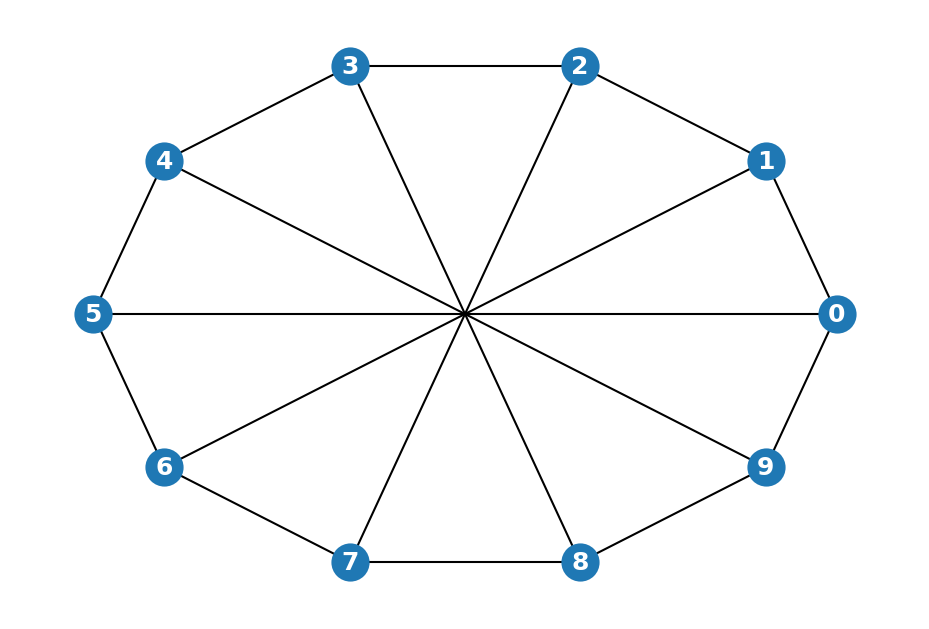

In [84]:
# Prueba de la función anterior
generar_grafica_pr(5)

## Ejercicio 2

La siguiente función genera una gráfica de `n` vértices, etiquetados del `1` hasta el `2n` de manera aleatoria. Cada par de vértices tiene una probabilidad `p` de estar conectado:

In [85]:
def random_graph(n, p, seed=42):
    np.random.seed(seed)
    g = nx.gnp_random_graph(n, p, seed=seed)
    labels = np.random.choice(range(1, 2*n), n, replace=False)
    mapping = {i: labels[i] for i in range(n)}
    g = nx.relabel_nodes(g, mapping)
    return g

La utilizamos para generar algunas gráficas:

In [86]:
g1 = random_graph(5, 0.4)
g2 = random_graph(10, 0.3)
g3 = random_graph(15, 0.2)

Escribe una función que tome una gráfica $G$, tome cada nodo y lo multiplique por todos sus adyacentes, y regrese la suma de todos estos productos. En caso de que un vértice no tenga ningún nodo adyacente, toma su valor original.

Por ejemplo, supongamos que tenemos la gráfica $G$:

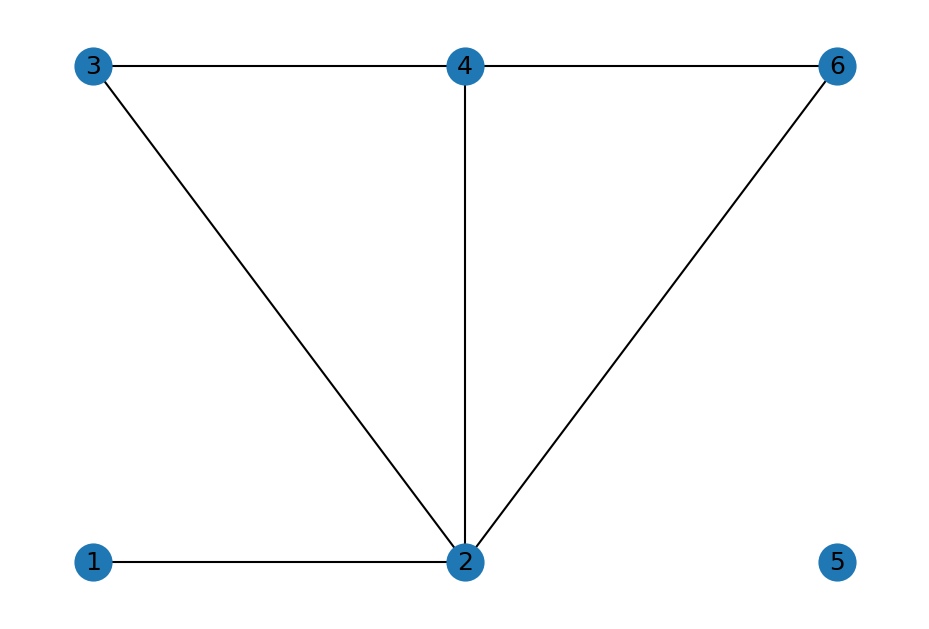

In [87]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 6), (2, 6), (2, 4)])

pos = {1: (0,0), 2:(1,0), 3:(0,1), 4:(1,1), 5:(2,0), 6:(2,1)}
nx.draw(G, with_labels=True, pos=pos)

Lo que debe de regresar tu función es:

$$
\begin{align}
    &(1 \cdot 2)\\
    +\ &(2 \cdot 1 \cdot 3 \cdot 4 \cdot 6)\\
    +\ &(3 \cdot 2 \cdot 4)\\ 
    +\ &(4 \cdot 2 \cdot 3 \cdot 6)\\ 
    +\ &5\\ 
    +\ &(6 \cdot 2 \cdot 4) \\
    =\ &367
\end{align}
$$

In [88]:
def graph_sum(G):
    '''
    Función que dada una gráfica, toma cada vértice, revisa sus vértices con los
    que es adyacente y los multiplica; este resultado se acumula y el procedimiento
    se repite con cada nodo. Al final devuelve la suma acumulada.
    '''
    lst_nodes = G.nodes
    suma = 0
    for node in lst_nodes:
        adj = list(G.adj[node])
        if len(adj) == 0:
            suma += node
            continue
        mult = node
        for i in adj:
            mult *= i
        suma += mult
    return suma    

In [89]:
# No alteres esta celda

print(f"""\
Resultado obtenido para la gráfica 1: {graph_sum(g1)}. Esperado: 986
Resultado obtenido para la gráfica 2: {graph_sum(g2)}. Esperado: 1377825
Resultado obtenido para la gráfica 3: {graph_sum(g3)}. Esperado: 5344401\
"""
)

Resultado obtenido para la gráfica 1: 986. Esperado: 986
Resultado obtenido para la gráfica 2: 1377825. Esperado: 1377825
Resultado obtenido para la gráfica 3: 5344401. Esperado: 5344401


## Ejercicio 3

Escribe una función que, dada una gráfica $G$, genere su [complemento](https://en.wikipedia.org/wiki/Complement_graph). Compara tu resultado con la función `nx.complement` (para comparar tendrás que usar la función `nx.is_isomorphic`, de otra manera regresará que no son iguales, a pesar de tener los mismos vértices y aristas).

In [90]:
def graph_complement(G):
    '''
    Función que regresa el complemento de una gráfica.
    '''
    edges = list(G.edges)
    vertices = list(G.nodes)

    G_k = nx.complete_graph(G)
    G_k_edges = list(G_k.edges)

    G_c = nx.Graph()
    G_c_edges = [e for e in G_k_edges if e not in edges]
    G_c.add_edges_from(G_c_edges)
    G_c.add_nodes_from(vertices)

    return G_c

In [91]:
# No alteres esta celda
ans = ["Falso", "Verdadero"]

print(
f"""\
La gráfica obtenida con nuestra función es isomorfa a la obtenida con NetworkX:
Gráfica 1: {ans[nx.is_isomorphic(nx.complement(g1), graph_complement(g1))]}
Gráfica 2: {ans[nx.is_isomorphic(nx.complement(g2), graph_complement(g2))]}
Gráfica 3: {ans[nx.is_isomorphic(nx.complement(g3), graph_complement(g3))]}\
""")

La gráfica obtenida con nuestra función es isomorfa a la obtenida con NetworkX:
Gráfica 1: Verdadero
Gráfica 2: Verdadero
Gráfica 3: Verdadero


In [1]:
A, B, C = 1,1,1
for i in range(19):
    A, B, C = A + B + C, B+C, A+B+C
print (A+ B + C)

267914296
